### 목표 : 생선 품종 분류 모델

-   데이터 : 2가지 품종의 생선 데이터 fish.csv
-   피쳐 : Weight, Length
-   타겟 : Species
-   유형 : 지도학습/분류


(1) 모듈 로딩 & 데이터 준비


In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data_file = "../data/fish.csv"


In [3]:
fishDF = pd.read_csv(data_file, usecols=[0, 1, 2])
fishDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [4]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(["Bream", "Smelt"])

# 해당 행만 도출
twoFishDF = fishDF[mask]
twoFishDF.info()

twoFishDF.reset_index(drop=True, inplace=True)
twoFishDF


<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


(2) 데이터 전처리 <hr>

-   정제: 결측치, 중복데이터, 이상치 처리
-   정규화 : 피쳐 스케일링


In [5]:
# 표준 정규분포 => 평균 0, 표준편차 1 => Z-score = (피쳐-평균)/표준편차
# Weight 컬럼
twoFishDF.Weight.mean(), twoFishDF.Weight.std()


(444.5, 328.1432328267642)

In [6]:
ret1 = twoFishDF.Weight - twoFishDF.Weight.mean()
ret1 /= twoFishDF.Weight.std()

# twoFishDF.loc[:, 'Weight'] = ret1


In [7]:
ret1 = twoFishDF.Length - twoFishDF.Length.mean()
ret1 /= twoFishDF.Length.std()

# twoFishDF.loc[:, 'Length'] = ret1


(3) 기계학습 데이터셋 전부 => 피쳐와 타겟 분리 <hr>


In [8]:
# 피쳐/특성/속성 데이터 추출
featureDF = twoFishDF[twoFishDF.columns[1:]]
featureDF.head(2)


,Weight,Length
0,242.0,25.4
1,290.0,26.3


In [9]:
# 클래스/타겟/라벨 데이터 추출 ==> 수치화 즉 정수인코딩
targetDF = twoFishDF["Species"]
targetDF.head(2)


0    Bream
1    Bream
Name: Species, dtype: object

In [10]:
targetDF = targetDF.replace({"Bream": 0, "Smelt": 1})
targetDF.dtype, targetDF.head(2)


(dtype('int64'),
 0    0
 1    0
 Name: Species, dtype: int64)

(3-1) 학습/테스트 데이터셋 분리 <hr>

-   지도학습 중 분류 => [고려] 타겟의 비율
-   학습 : 테스트 = 80 : 20


In [11]:
# 모듈 로딩
from sklearn.model_selection import train_test_split


In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    featureDF, targetDF, test_size=0.2, stratify=targetDF
)


In [13]:
# 학습 및 테스트 데이터셋 확인
print(f"학습용 데이터셋 ---->\n{x_train.shape}, {y_train.shape}")
print(f"\n {y_train.value_counts() / y_train.shape[0]}")

print(f"테스트용 데이터셋 ---->\n{x_test.shape}, {y_test.shape}")
print(f"\n {y_test.value_counts() / y_test.shape[0]}")


학습용 데이터셋 ---->
(39, 2), (39,)

 Species
0    0.717949
1    0.282051
Name: count, dtype: float64
테스트용 데이터셋 ---->
(10, 2), (10,)

 Species
0    0.7
1    0.3
Name: count, dtype: float64


(3-2) 피쳐 데이터의 스케일링 <hr>

-   피쳐들의 값의 범위가 다른 것을 통일시켜줌
-   scikit-learn의 preprocessing 모듈 활용


In [44]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [45]:
# 표준정규분포 스케일링 : 평균 0, 표준편차 1
# (1) 스케일러 인스턴스 생성
# (2) 데이터에 대한 평균, 표준편차 계산 진행: fit() 메서드
# (3) 데이터에 대한 스케일링 진행 : transform() 메서드


In [46]:
scaler = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = RobustScaler()


In [17]:
scaler.fit(x_train)


StandardScaler()

In [18]:
scaler.mean_


array([463.66666667,  27.51538462])

In [19]:
# 학습용 데이터 피쳐 스케일링
scaled_x_train = scaler.transform(x_train)
scaled_x_train.shape


(39, 2)

In [20]:
# 테스트용 데이터 피쳐 스케일링
scaled_x_test = scaler.transform(x_test)
scaled_x_test.shape


(10, 2)

(3-3) 시각화


In [21]:
# 모듈 로딩
import matplotlib.pyplot as plt


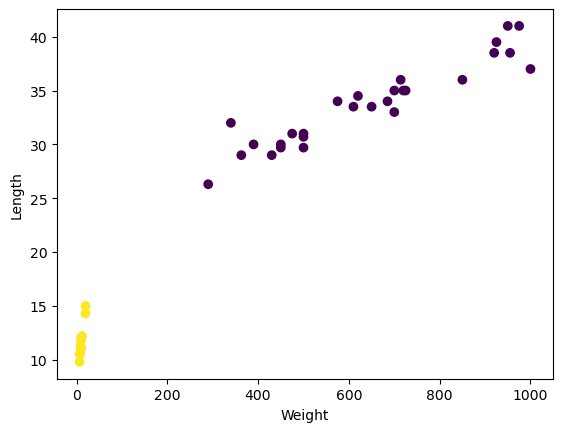

In [22]:
## => 원본 데이터 시각화 : x_train
plt.scatter(x_train.Weight, x_train.Length, c=y_train)
plt.xlabel("Weight")
plt.ylabel("Length")
plt.show()


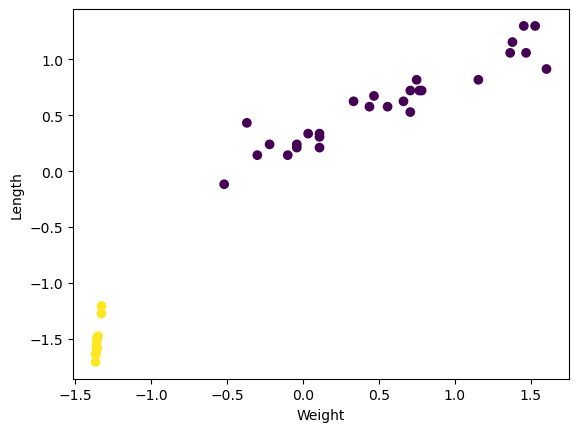

In [23]:
## => 스케일된 데이터 시각화 ==> scaled_x_train
plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1], c=y_train)
plt.xlabel("Weight")
plt.ylabel("Length")
plt.show()


(4) 학습 진행


In [24]:
## 방법 (1) : KNN 알고리즘
fishModel = KNeighborsClassifier()
fishModel


KNeighborsClassifier()

In [25]:
# 학습
fishModel.fit(scaled_x_train, y_train)


KNeighborsClassifier()

In [33]:
# 방법 (2) : SVC
from sklearn.svm import SVC

fishModel2 = SVC()

fishModel2.fit(scaled_x_train, y_train)


SVC()

In [39]:
# 방법 3 : LogisticRegression
from sklearn.linear_model import LogisticRegression

fishModel3 = LogisticRegression()

fishModel3.fit(scaled_x_train, y_train)


LogisticRegression()

(5) 테스트 진행


In [42]:
print("KNN :", fishModel.score(scaled_x_test, y_test))
print("SVC :", fishModel2.score(scaled_x_test, y_test))
print("LogisticRegression :", fishModel3.score(scaled_x_test, y_test))


KNN : 1.0
SVC : 1.0
LogisticRegression : 1.0


(6) 예측 <hr>


In [ ]:
## 생선 무게, 길이 입력 받은 후 결과 반환
input("생선의 무게, 길이 입력 (예: 90, 20) : ")


In [27]:
## 길이 25, 무게 160인 생선의 품종 예측
new_data = pd.DataFrame([[160, 25]], columns=twoFishDF.columns[1:])
new_data


,Weight,Length
0,160,25


In [28]:
# 피쳐스케일링 진행
scaled_new_data = scaler.transform(new_data)
scaled_new_data


array([[-0.90732573, -0.24203005]])

In [29]:
# 예측
y_pre = fishModel.predict(scaled_new_data)


In [30]:
_, index = fishModel.kneighbors(scaled_new_data)
index = index.tolist()[0]
index


[8, 13, 4, 24, 34]

In [31]:
scaled_x_train[index, 0]


array([-0.51889869, -0.30078196, -0.22010866, -0.36950367, -0.10059264])

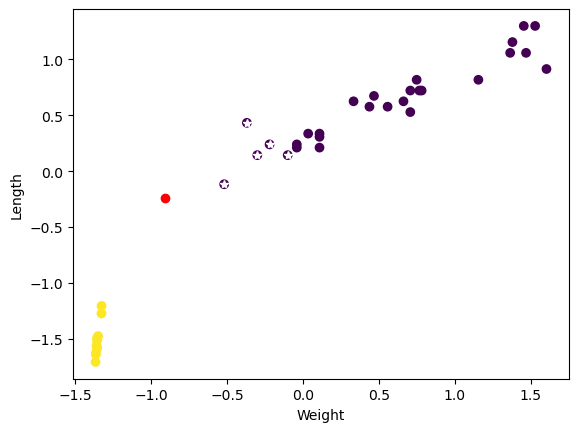

In [32]:
plt.plot(scaled_new_data[0, 0], scaled_new_data[0, 1], "ro")
plt.scatter(scaled_x_train[:, 0], scaled_x_train[:, 1], c=y_train)
plt.plot(scaled_x_train[index, 0], scaled_x_train[index, 1], "w*")
plt.xlabel("Weight")
plt.ylabel("Length")
plt.show()


In [35]:
fishModel2.predict(scaled_new_data)


array([0], dtype=int64)